In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x=data.iloc[:,:-1]
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [4]:
y=data.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

C:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Species Count'}, xlabel='Species', ylabel='count'>

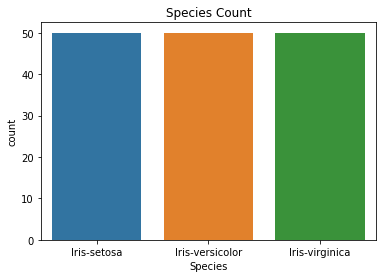

In [5]:
plt.title('Species Count')
sns.countplot(data['Species'])

<AxesSubplot:title={'center':'Sepal Length Vs Sepal Width'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

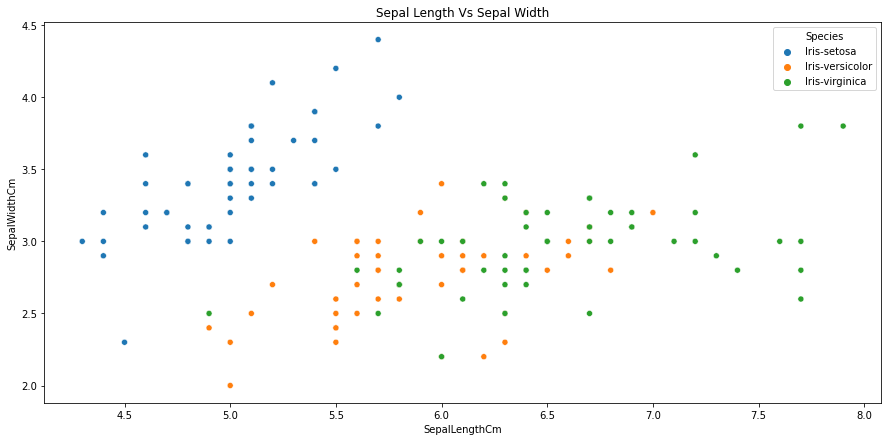

In [6]:
plt.figure(figsize=(15,7))
plt.title('Sepal Length Vs Sepal Width')
sns.scatterplot(x=x['SepalLengthCm'],y=x['SepalWidthCm'],hue=data['Species'])

<AxesSubplot:title={'center':'Petal Length Vs Petal Width'}, xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

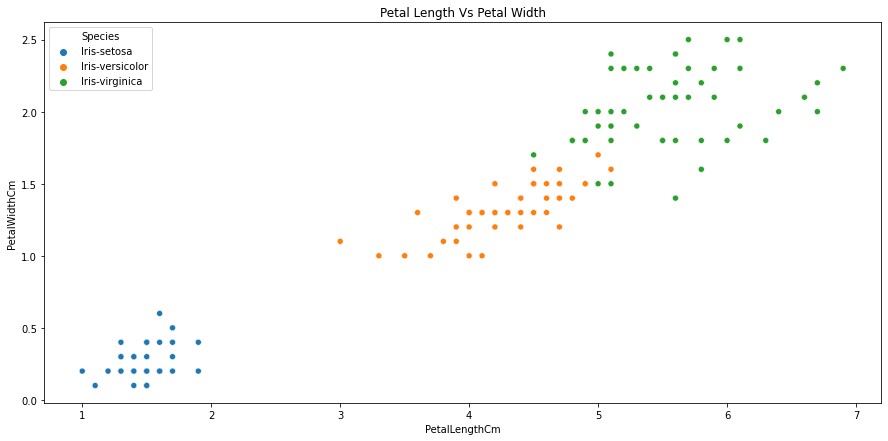

In [7]:
plt.figure(figsize=(15,7))
plt.title('Petal Length Vs Petal Width')
sns.scatterplot(x=x['PetalLengthCm'],y=x['PetalWidthCm'],hue=data['Species'])

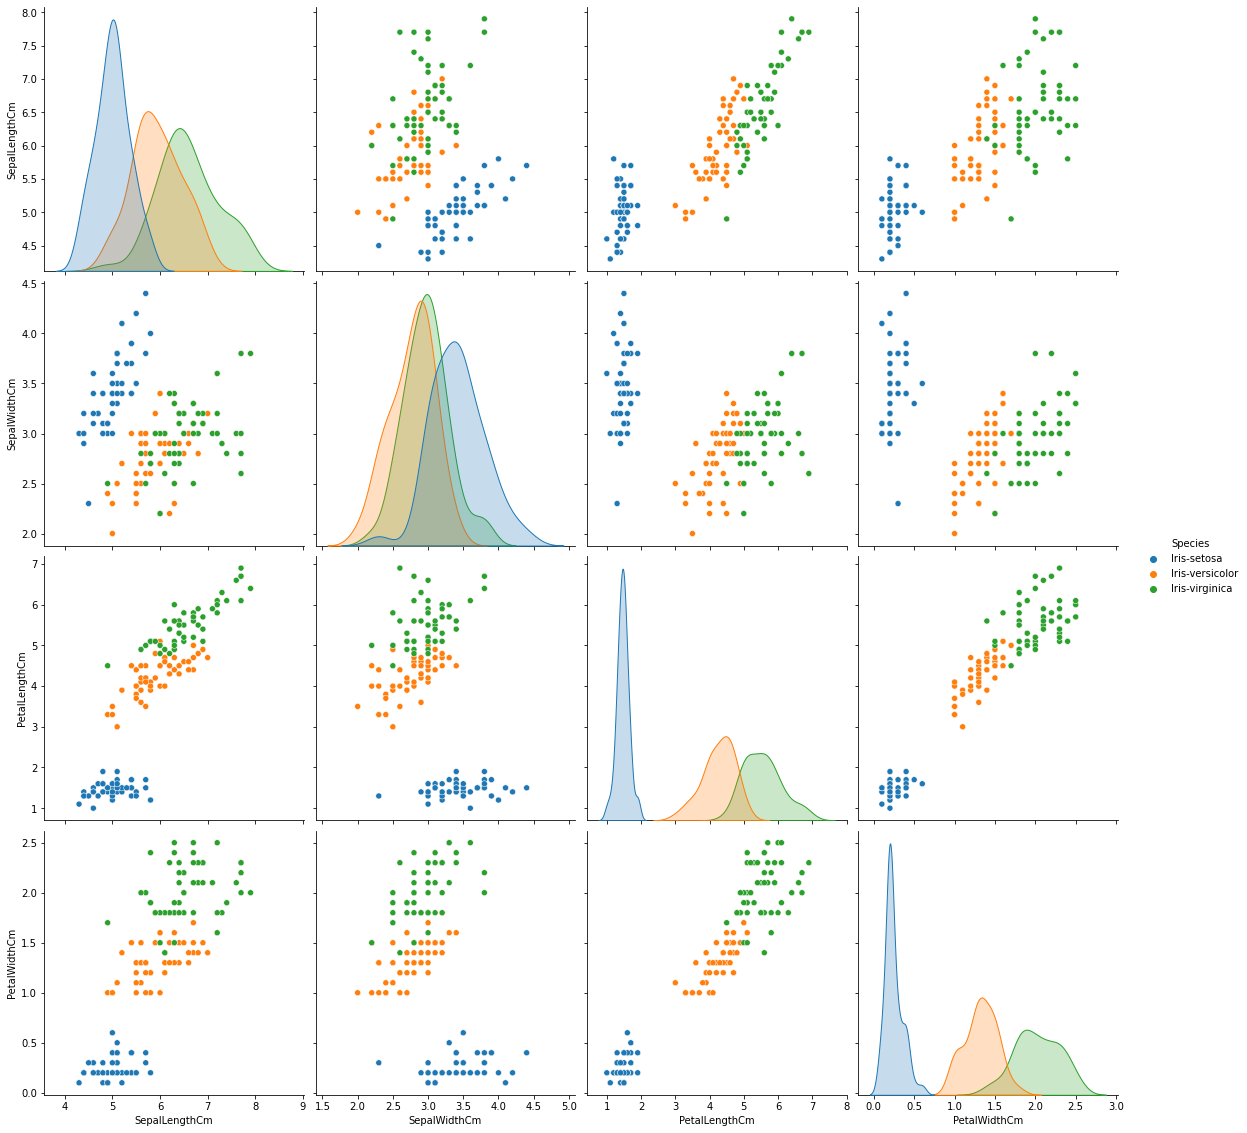

In [8]:
sns.pairplot(data.iloc[:,1:],hue='Species',height=4)

<AxesSubplot:>

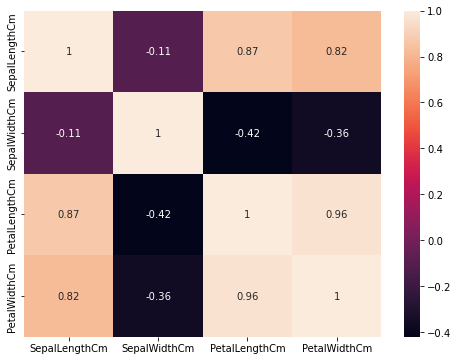

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(data.iloc[:,1:].corr(),annot=True)

In [10]:
#splitting the dataset in to training and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

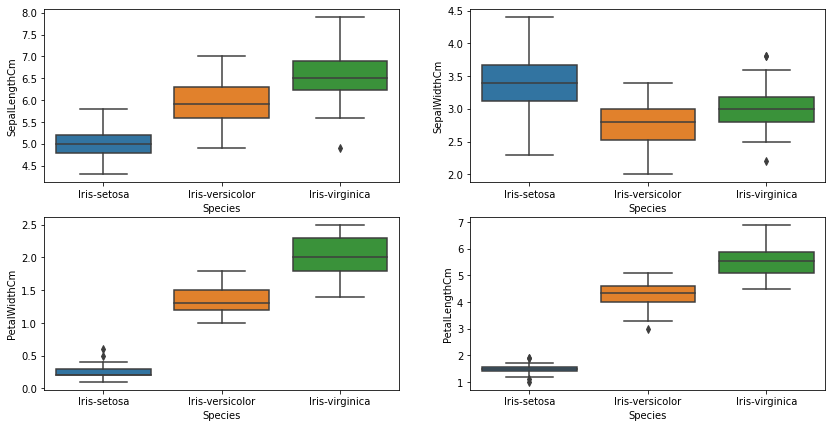

In [11]:
fig,axes=plt.subplots(2,2,figsize=(14,7))
sns.boxplot(y='SepalLengthCm',x='Species',data=data,ax=axes[0,0])
sns.boxplot(y='SepalWidthCm',x='Species',data=data,ax=axes[0,1])
sns.boxplot(y='PetalWidthCm',x='Species',data=data,ax=axes[1,0])
sns.boxplot(y='PetalLengthCm',x='Species',data=data,ax=axes[1,1])

In [12]:
#SVM model
svm = SVC(kernel='rbf',random_state=0,gamma=0.10,C=1.0)
svm.fit(x_train,y_train)

SVC(gamma=0.1, random_state=0)

In [13]:
y_pred=svm.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
print("Accuracy :{:.2f}".format(accuracy_score(y_test,y_pred)*100),"%")

Accuracy :96.67 %


In [15]:
#KNN model
knn = KNeighborsClassifier(n_neighbors=7,p=2,metric='minkowski')
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [16]:
y_pred2 = knn.predict(x_test)
y_pred2

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
print("Accuracy : {:.2f}".format(accuracy_score(y_test,y_pred2)*100),"%")

Accuracy : 96.67 %


In [18]:
#Decision Tree model
dt=DecisionTreeClassifier(criterion="gini")
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred3=dt.predict(x_test)
y_pred3

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
print("Accuracy : {:.2f}".format(accuracy_score(y_test,y_pred3)*100),"%")

Accuracy : 96.67 %
